**정형** 데이터, **비정형** 데이터는 Target 유형(**수치형** or **범주형**)에 따라

**회귀** 또는 **분류** 문제로 분석할 수 있다.

## 3) EDA 가설 설정
탐색적 자료 분석을 하기 전, 가설 2가지를 설정해 주세요!

따릉이 대여량은 강수에 영향을 받을 것이다.

> **1. 하늘 상태(sky_condition)가 흐릴수록 대여량이 적을 것이다.**
  - sky_condition (하늘 상태) : 맑음(1), 구름조금(2), 구름많음(3), 흐림(4)
>
> **2. 강수 형태(precipitation_form)가 0(없음)이 아니면 대여량이 적을 것이다.**
  - precipitation_form (강수 형태): 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)
>
> **3. 강수 확률(Precipitation_Probability)이 높을수록 대여량이 적을 것이다.**

### **따릉이 대여량 데이터**

**Features**
>- date_time : 일별 날짜 ---> (사용X)
- wind_direction: 풍향 (degree)
- sky_condition : 하늘 상태
- precipitation_form : 강수 형태
-wind_speed : 풍속 (m/s)
-humidity : 습도 (%)
-low_temp : 최저 기온 ( `C)
-high_temp : 최고 기온 ( `C)
- Precipitation_Probability : 강수 확률 (%)

**Target**
>- number_of_rentals : 따릉이 대여량



---

- sky_condition (하늘 상태) : 맑음(1), 구름조금(2), 구름많음(3), 흐림(4)

  - 2019년 6월 4일 까지 sky_condition (하늘 상태) : 맑음(1), 구름조금(2), 구름많음(3), 흐림(4)

  - 2020년  sky_condition (하늘 상태) : 맑음(1), 구름많음(3), 흐림(4)

- precipitation_form (강수 형태) : 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)

  - 원본 데이터에는 없음(0), 비(1),소나기(4)가 포함되어있었으며 진눈깨비(2)와 눈(3) 성분은 존재하지 않습니다.
  - **train.describe()**에서 precipitation_form의 min: 0, max: 1임을 확인했다.


---
>* 정형 데이터 문제(Structured Data)
>
>* 회귀 문제(Regression)


## 4) Target & Feature 관계
Target(따릉이 대여량)을 EDA했을 때, 대여량이 현저히 적은 날이 있었습니다. Feature에서 어떤 특징을 발견했나요?

따릉이 대여량 8000을 기준으로 비교한 결과


**대여량이 적은 날은...**
>- **하늘 상태(sky_condition)가 흐리다.**
>
>- **강수 형태(precipitation_form)가 비(1)에 가깝다.**
>
>- **강수 확률(Precipitation_Probability)이 높다.** (65% 이상)

In [1]:
# 데이터 프레임 생성을 위한 라이브러리
import pandas as pd

# 시각화를 위한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

In [2]:
train = pd.read_csv('/content/drive/MyDrive/따릉이/train.csv')
test = pd.read_csv('/content/drive/MyDrive/따릉이/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/따릉이/sample_submission.csv')
train.head(3)

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.0,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.0,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.0,2.690,74.879,10.312,15.316,19.113,26817


In [3]:
def compare(idx):
  x = ['8000<=' + low.index[idx], '8000>' + high.index[idx]]
  y = [low.values[idx], high.values[idx]]

  plt.figure(figsize = (8,5))
  plt.title(low.index[idx]+ " 의 평균")
  plt.xlabel('피쳐')
  plt.ylabel('수치')
  plt.bar(x, y)
  plt.show()

low = train[train['number_of_rentals']<=8000].mean()
high = train[train['number_of_rentals']>8000].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]


### 4-1 하늘 상태(sky_condition) 
: 1(맑음) ~ 4(흐림)의 범위.  맑음(1), 구름조금(2), 구름많음(3), 흐림(4)
> 대여량이 8000 이하인 날의 sky_condition는 구름많음~흐림인 것을 알 수 있다. (3.5 이상)


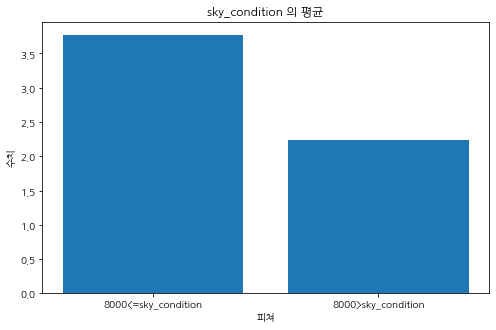

In [4]:
compare(1)

### 4-2 강수 형태(precipitation_form)
: 0(없음) ~ 1(비)의 범위
> 대여량이 8000이하인 날은 precipitation_form이 1(비)에 가깝다

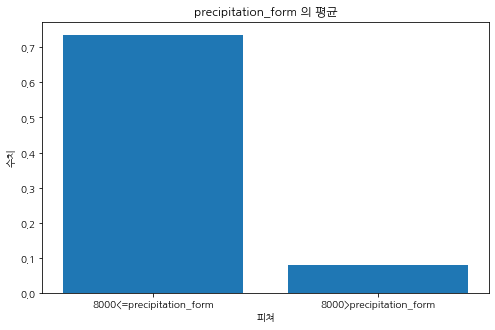

In [5]:
compare(2)

### 4-3 강수 확률(Precipitation_Probability)
: 0~100(%)의 범위 - .describe()으로 확인
> 대여량이 8000이하인 날은 Precipitation_Probability가 높다. (60% 이상)

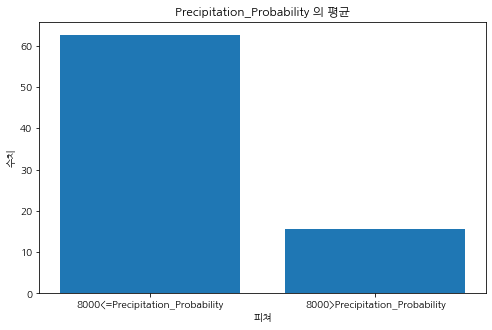

In [6]:
compare(7)

# 별첨

## 따릉이 대여량 데이터

**Features**
>- date_time : 일별 날짜 ---> (사용X)
- wind_direction: 풍향 (degree)
- sky_condition : 하늘 상태
- precipitation_form : 강수 형태
-wind_speed : 풍속 (m/s)
-humidity : 습도 (%)
-low_temp : 최저 기온 ( `C)
-high_temp : 최고 기온 ( `C)
- Precipitation_Probability : 강수 확률 (%)

**Target**
>- number_of_rentals : 따릉이 대여량



---


- 2019년 6월 4일 까지 sky_condition (하늘 상태) 코드  : 맑음(1), 구름조금(2), 구름많음(3), 흐림(4)

- 2020년  sky_condition (하늘 상태) 코드  : 맑음(1), 구름많음(3), 흐림(4)

- precipitation_form (강수 형태) 코드 : 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)

  - 원본 데이터에는 없음(0), 비(1),소나기(4)가 포함되어있었으며 진눈깨비(2)와 눈(3) 성분은 존재하지 않습니다.


---



### 1. Target
: number_of_rentals 따릉이 대여량

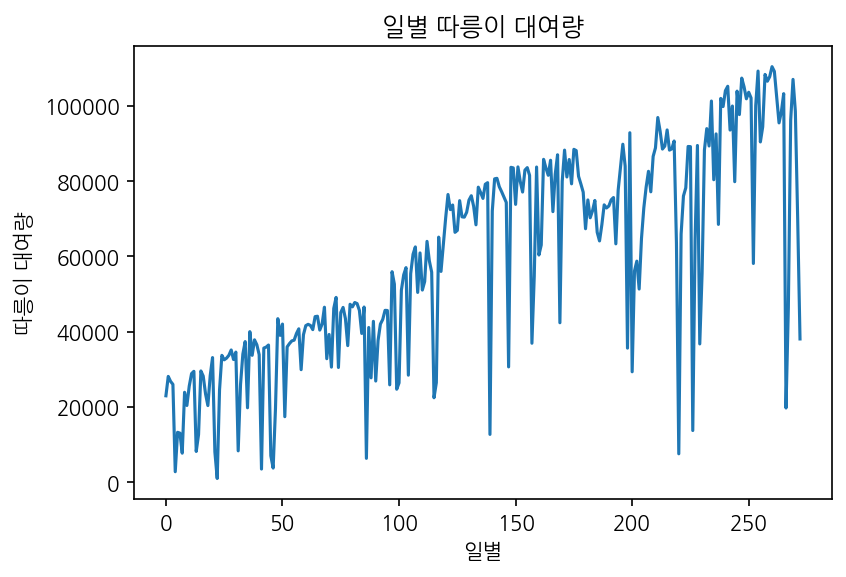

In [7]:
x = train['number_of_rentals'].index
y = train['number_of_rentals'].values

plt.figure(dpi=150)

plt.title('일별 따릉이 대여량')
plt.xlabel('일별')
plt.ylabel('따릉이 대여량')

plt.plot(x,y)
plt.show()

### date_time 

#### train
: 2018,2019,2020년 총 3개년의 4,5,6월에 대한 자료이다.

In [8]:
def year_month(text:str):
  return text[:7]
train['연월'] = train['date_time'].map(year_month)

print(train['연월'].value_counts())
train.groupby('연월').mean()[['number_of_rentals']]

2018-05    31
2019-05    31
2020-05    31
2018-04    30
2018-06    30
2019-04    30
2019-06    30
2020-04    30
2020-06    30
Name: 연월, dtype: int64


,number_of_rentals
연월,
2018-04,22929.500000
2018-05,31148.677419
2018-06,40237.433333
2019-04,48933.333333
2019-05,72028.870968
2019-06,76462.633333
2020-04,71913.000000
2020-05,80010.645161
2020-06,92361.933333


#### test
: 2021년의 4,5,6월에 대한 자료이다.

In [9]:
test['연월'] = test['date_time'].map(year_month)

test['연월'].value_counts()

2021-05    31
2021-04    30
2021-06    30
Name: 연월, dtype: int64

### .drop() 메서드
: 열(axis=1) 제거

In [10]:
train = train.drop(['date_time'], axis=1)
test = test.drop(['date_time'], axis=1)

train.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,연월
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018-04
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018-04
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018-04
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018-04
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018-04


## 개념) 데이터


### 범주형 데이터(Categorical data)


#### **명목 척도**
>- 성별
>- 날짜



#### **서열 척도**
>- 순위
>- 사회 계층

### 수치형 데이터(Numeric data)


#### **등간 척도**
>- 지능지수
>- 온도 등


#### **비율 척도**
>- 매출액
>- 따릉이 대여량